In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set_style('darkgrid')

In [15]:
# fun-fact: sns can also load up data
iris = sns.load_dataset('iris')

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# now to see which flower species is most separable from the rest

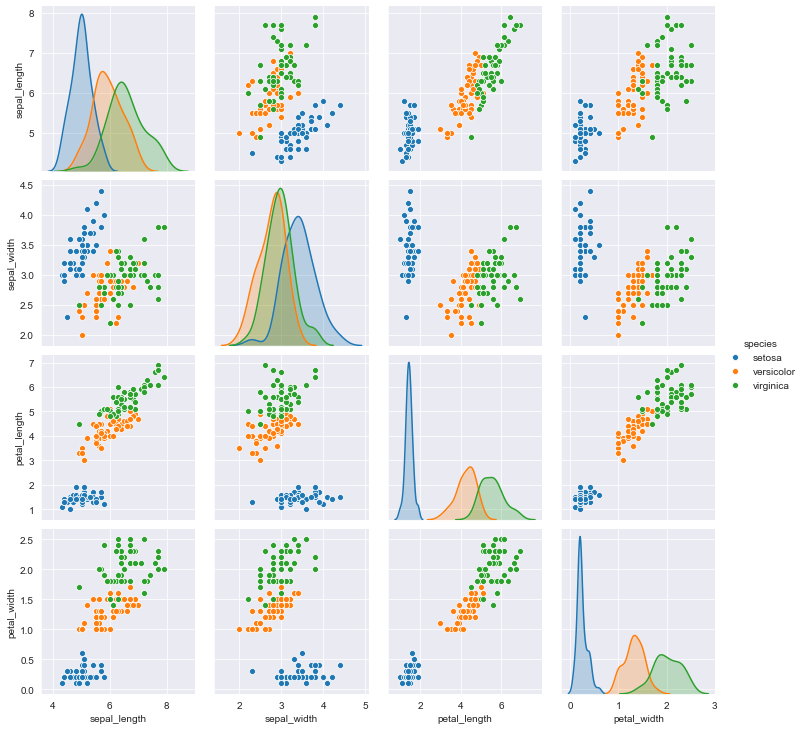

In [20]:
sns.pairplot(iris,hue='species')

In [21]:
# blindly obvious, the blue color here or the Setosa flower is mostly separate than the other two.
# Let's make what is called a kde plot.... just for fun...
# it will be between the sepal_width and sepal_length of setosa flowers.

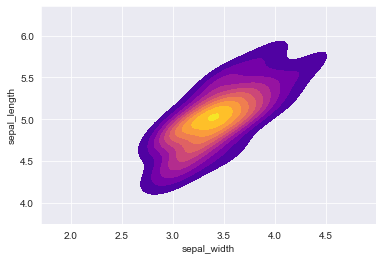

In [23]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap='plasma', shade=True, shade_lowest=False)

In [24]:
# enough playing around... time to train the data..

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
from sklearn.svm import SVC

In [28]:
svc_model = SVC()

In [30]:
svc_model.fit(X_test,y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
# that was easy..... hehe
# now let's see how well our model did 

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
predictions = svc_model.predict(X_test)

In [34]:
print('RESULTS OF THE Support Vector Machine\n')
print(classification_report(y_true=y_test, y_pred=predictions))
print('-------------------------------------------------------\n\n')
print(confusion_matrix(y_test, predictions))

RESULTS OF THE Support Vector Machine

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

-------------------------------------------------------


[[16  0  0]
 [ 0 15  0]
 [ 0  1 13]]


In [35]:
# that is a pretty good result. But reality is often disappointing.
# We got lucky and this is a small dataset. Plus the default values of SVC are not always optimum for your desired results.
# So let's make a, say, virtual model that will test our SVC with various parameters and find the best possible combination of the parameter values.


In [37]:
# We will now use something called Grid Search
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.01,0.001]}

In [40]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=1.000, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.952, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=1.000, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=1.000, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.905, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.952, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=10, gamma=0.001, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.905, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.857, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.905, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.905, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.905, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.952, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [41]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [42]:
grid.best_score_

0.9714285714285715

In [43]:
# Those are our best possible parameter combinations and the accuracy score they give is 97.. I'd say pretty good.
# Comparing that to our confusion matrix and classification report will make things much clearer.

In [44]:
print('RESULTS OF THE Support Vector Machine with best parameters\n')
print(classification_report(y_true=y_test, y_pred=predictions))
print('-------------------------------------------------------\n\n')
print(confusion_matrix(y_test, predictions))

RESULTS OF THE Support Vector Machine with best parameters

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

-------------------------------------------------------


[[16  0  0]
 [ 0 15  0]
 [ 0  1 13]]


In [45]:
# So as we can see, the better params are always just a find away...